In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### NumPy标准数据类型
![dtypes](./pics/numpy_dtypes.png)

In [2]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [3]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

In [4]:
np.zeros(10, dtype='float16')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float16)

### NumPy数组的属性

In [5]:
np.random.seed(42)

In [6]:
x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3, 4))
x3 = np.random.randint(10, size=(3, 4, 5))

In [7]:
x1

array([6, 3, 7, 4, 6, 9])

In [8]:
x2

array([[2, 6, 7, 4],
       [3, 7, 7, 2],
       [5, 4, 1, 7]])

In [9]:
print('x3 ndim: ', x3.ndim)
print('x3 shape: ', x3.shape)
print('x3 size: ', x3.size)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60


In [10]:
print('x3 dtype: ', x3.dtype)

x3 dtype:  int64


- 每个数组元素字节大小的`itemsize`
- 表示数组总字节大小的属性`nbytes`

In [11]:
print('x3 itemsize: ', x3.itemsize)
print('x3 nbytes: ', x3.nbytes)

x3 itemsize:  8
x3 nbytes:  480


数组切片返回的是数组数据的**视图**,而不是数值数据的**副本**

In [12]:
x2

array([[2, 6, 7, 4],
       [3, 7, 7, 2],
       [5, 4, 1, 7]])

In [13]:
x2_sub = x2[:2, :2]

In [14]:
x2_sub

array([[2, 6],
       [3, 7]])

In [15]:
x2_sub[:, :] = [[1, 2], [3, 4]]

In [16]:
x2

array([[1, 2, 7, 4],
       [3, 4, 7, 2],
       [5, 4, 1, 7]])

In [17]:
x2_sub

array([[1, 2],
       [3, 4]])

In [18]:
x2_sub_copy = x2[:2, :2].copy()

In [19]:
x2_sub_copy

array([[1, 2],
       [3, 4]])

In [20]:
x2_sub_copy[:, :] = [[2, 3], [4, 5]]

In [21]:
x2

array([[1, 2, 7, 4],
       [3, 4, 7, 2],
       [5, 4, 1, 7]])

### 数组的变形

In [22]:
grid = np.arange(1, 10).reshape((3, 3))

In [23]:
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

将一个一维数组转变为二维的行或列的矩阵`newaxis`

In [24]:
x = np.arange(10)

In [25]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [26]:
x[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### 数组拼接和分裂
#### 数组的拼接
- `np.concatenate`
- `np.vstack` 第一维度
- `np.hstack` 第二维度
- `np.dstack` 第三维度

In [27]:
x = np.arange(1, 10)
y = np.arange(0, 9)

In [28]:
np.concatenate([x, y])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [29]:
x = np.arange(1, 10).reshape((3, 3))
y = np.arange(0, 9).reshape((3, 3))

In [30]:
np.concatenate([x, y])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
np.concatenate([x, y], axis=1)

array([[1, 2, 3, 0, 1, 2],
       [4, 5, 6, 3, 4, 5],
       [7, 8, 9, 6, 7, 8]])

In [32]:
x = np.arange(1, 28).reshape((3, 3, 3))
y = np.arange(0, 18).reshape((3, 2, 3))

In [33]:
np.concatenate([x, y], axis=1)

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [ 0,  1,  2],
        [ 3,  4,  5]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27],
        [12, 13, 14],
        [15, 16, 17]]])

In [34]:
x = np.arange(1, 10).reshape((3, 3))
y = np.arange(0, 9).reshape((3, 3))
np.vstack([x, y])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [35]:
np.hstack([x, y])

array([[1, 2, 3, 0, 1, 2],
       [4, 5, 6, 3, 4, 5],
       [7, 8, 9, 6, 7, 8]])

In [36]:
x = np.arange(1, 28).reshape((3, 3, 3))
y = np.arange(0, 27).reshape((3, 3, 3))

In [37]:
np.vstack([x, y])

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]],

       [[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [38]:
np.hstack([x, y])

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [39]:
np.dstack([x, y])

array([[[ 1,  2,  3,  0,  1,  2],
        [ 4,  5,  6,  3,  4,  5],
        [ 7,  8,  9,  6,  7,  8]],

       [[10, 11, 12,  9, 10, 11],
        [13, 14, 15, 12, 13, 14],
        [16, 17, 18, 15, 16, 17]],

       [[19, 20, 21, 18, 19, 20],
        [22, 23, 24, 21, 22, 23],
        [25, 26, 27, 24, 25, 26]]])

#### 数组的分裂
- `np.split`
- `np.hsplit`
- `np.vsplit`

In [40]:
x = np.arange(0, 27).reshape((3, 3, 3))

In [41]:
x

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [42]:
np.split(x, [2], axis=2)

[array([[[ 0,  1],
         [ 3,  4],
         [ 6,  7]],
 
        [[ 9, 10],
         [12, 13],
         [15, 16]],
 
        [[18, 19],
         [21, 22],
         [24, 25]]]), array([[[ 2],
         [ 5],
         [ 8]],
 
        [[11],
         [14],
         [17]],
 
        [[20],
         [23],
         [26]]])]

In [43]:
np.hsplit(x, [2])

[array([[[ 0,  1,  2],
         [ 3,  4,  5]],
 
        [[ 9, 10, 11],
         [12, 13, 14]],
 
        [[18, 19, 20],
         [21, 22, 23]]]), array([[[ 6,  7,  8]],
 
        [[15, 16, 17]],
 
        [[24, 25, 26]]])]

In [44]:
np.vsplit(x, [2])

[array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],
 
        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]]), array([[[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])]

### 通用函数

使NumPy变快的关键是利用向量化操作，通常在NumPy的通用函数(ufunc)中实现

NumPy为很多类型的操作提供了非常方便的、静态类型的、可编译程序的接口，称为通用函数

- 一元通用函数
- 二元通用函数

算术运算符都是 NumPy 内置函数的简单封装器

#### 高级的通用函数特性
- 指定输出

In [45]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [46]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


如果这里写的是`y[::2] = 2 ** x`，那么结果将是创建一个临时数组，该数组存放的是`2 ** x`的结果，并且接下来会将这些值复制到`y`数组中

- 聚合

二元通用函数有些非常有趣的聚合功能，这些聚合可以直接在对象上计算

In [47]:
# redcue
x = np.arange(1, 6)
np.add.reduce(x)

15

In [48]:
np.multiply.reduce(x)

120

In [49]:
# accumulate
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [50]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

- 外积

任何通用函数都可以用 outer 方法获得两个不同输入数组所有元素对的函数运算结果

In [51]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### 聚合：最小值、最大值和其他值
#### 数组值求和

In [52]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

81.2 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
614 µs ± 45.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 最小值和最大值

In [53]:
%timeit min(big_array)
%timeit np.min(big_array)

53.3 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
681 µs ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 多维度聚合

In [54]:
M = np.random.random((3, 4))
print(M)

[[0.47974726 0.65527026 0.01059943 0.39962153]
 [0.51401002 0.69895981 0.01650441 0.97578831]
 [0.43442978 0.53831921 0.73989168 0.21823959]]


In [55]:
M.sum()

5.6813812645705495

In [56]:
M.min(axis=0)

array([0.43442978, 0.53831921, 0.01059943, 0.21823959])

In [57]:
M.max(axis=1)

array([0.65527026, 0.97578831, 0.73989168])

#### 其他聚合函数
![numpy_agg](./pics/numpy_agg.jpg)

#### 示例：美国总统的身高是多少

In [58]:
data = pd.read_csv('./data/president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [59]:
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [60]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


In [61]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


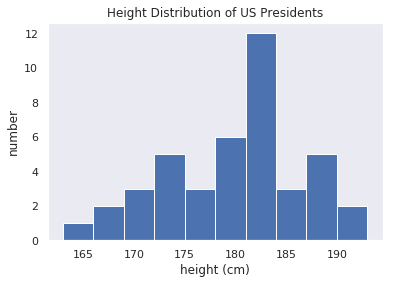

In [62]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')
plt.grid(False)

### 数组的计算：广播

用于不同大小数组的二进制通用函数（加、减、乘等）的一组规则

In [63]:
a = np.array([0, 1, 2])
a + 5

array([5, 6, 7])

#### 广播的规则

- 规则1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补1
- 规则2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另外一个数组的形状
- 规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常

### 比较、掩码和布尔逻辑
#### 比较
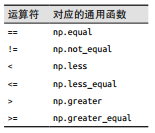

#### 操作布尔数组

In [64]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [65]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

False会被解释成0，True会被解释成1

In [66]:
np.count_nonzero(x < 6)

8

In [67]:
np.sum(x < 6)

8

In [68]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [69]:
np.any(x > 8)

True

In [70]:
np.any(x < 0)

False

In [71]:
np.all(x < 10)

True

In [72]:
np.all(x == 6)

False

In [73]:
np.all(x < 8, axis=1)

array([ True, False,  True])

#### 布尔运算符

同标准的算术运算符一样，NumPy用通用函数重载了逻辑运算符

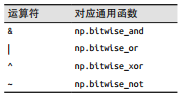

#### 将布尔数组作为掩码

In [74]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [75]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

### 花哨索引

In [76]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [77]:
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [78]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

#### 示例：数据区间划分

In [80]:
np.random.seed(42)
x = np.random.randn(100)

In [81]:
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [82]:
i = np.searchsorted(bins, x)

In [83]:
np.add.at(counts, i, 1)

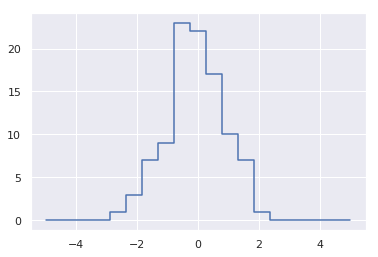

In [84]:
plt.plot(bins, counts, linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

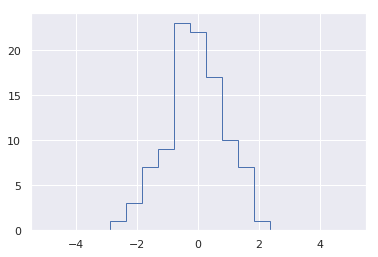

In [85]:
plt.hist(x, bins, histtype='step')